In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

import fastf1
import fastf1.plotting

import os
import time

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False)


/var/data/python/lib/python3.12/site-packages/fastf1/plotting/_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(


In [5]:
def show_laptime_comp(team_drivers, session):
    driver_1_laps = session.laps.pick_drivers(team_drivers[0]).pick_laps(range(0, (int(max(session.laps['LapNumber']))+1))).reset_index()
    driver_2_laps = session.laps.pick_drivers(team_drivers[1]).pick_laps(range(0, (int(max(session.laps['LapNumber']))+1))).reset_index()
    if len(driver_1_laps) > 1 :
        driver_1_laps.loc[0, 'LapTime'] = driver_1_laps.loc[1, 'LapStartTime'] - driver_1_laps.loc[0, 'LapStartTime']
    if len(driver_2_laps)>1:
        driver_2_laps.loc[0, 'LapTime'] = driver_2_laps.loc[1, 'LapStartTime'] - driver_2_laps.loc[0, 'LapStartTime']

    last_lap = int(max(session.laps['LapNumber']))

    fig, ax = plt.subplots(figsize=(11, 5))
    
    ax.plot(driver_1_laps['LapNumber'], driver_1_laps['LapTime'], color=team_color)
    ax.plot(driver_2_laps['LapNumber'], driver_2_laps['LapTime'], color=team_color_2)
    ax.tick_params(labelright=True)
    ax.set_xlim([0, last_lap])
    
    plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
    
    plt.grid(color='w', which='major', axis='both', linestyle='dotted')

core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', '22', '31', '87', '30', '5', '14', '55', '7', '6']
/tmp/ipykernel_4005/1390664183.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, i

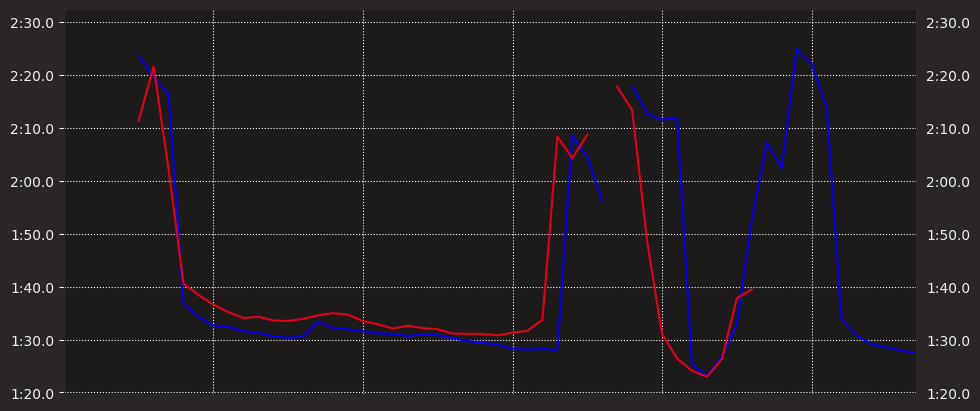

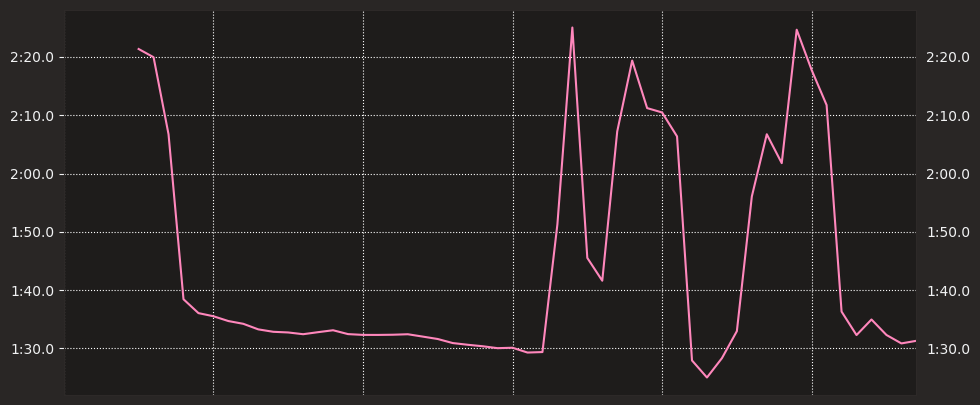

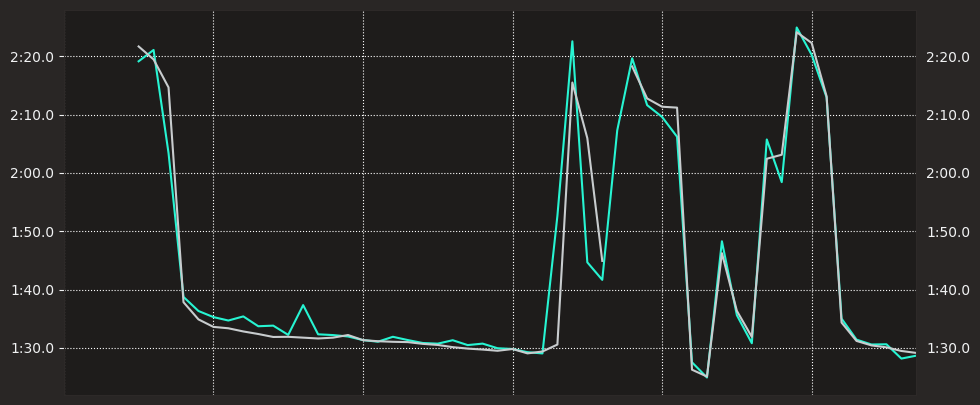

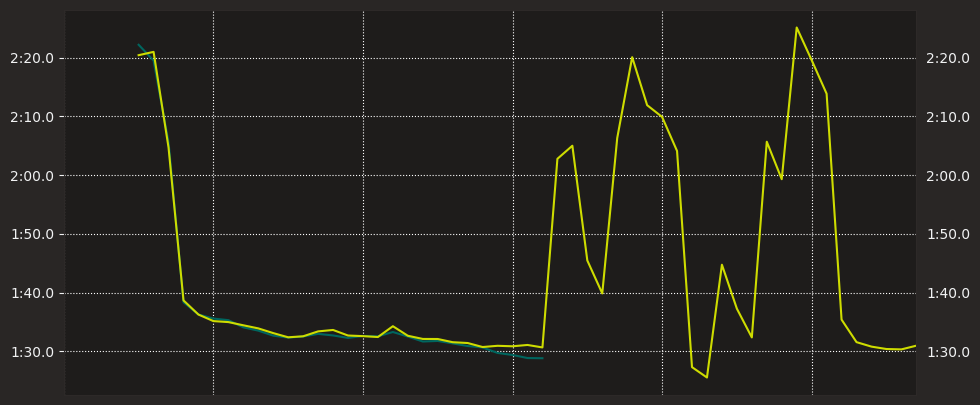

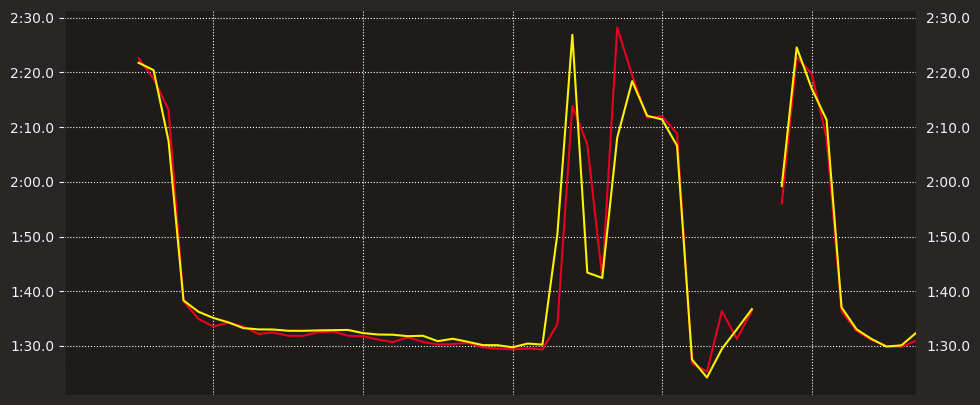

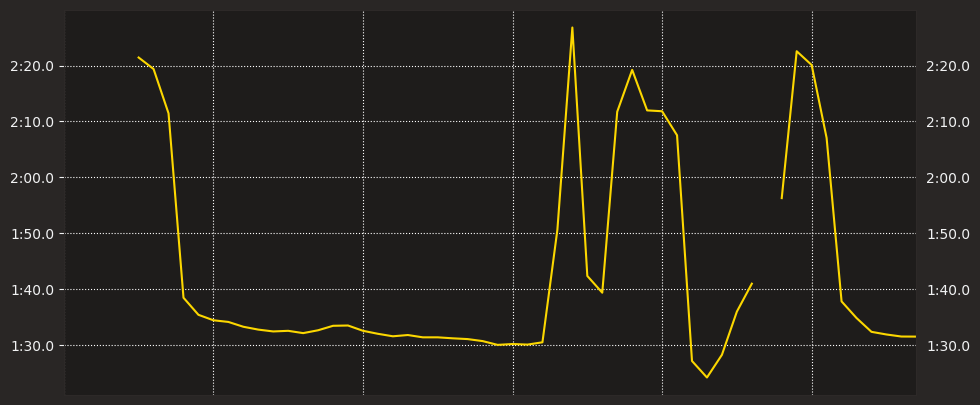

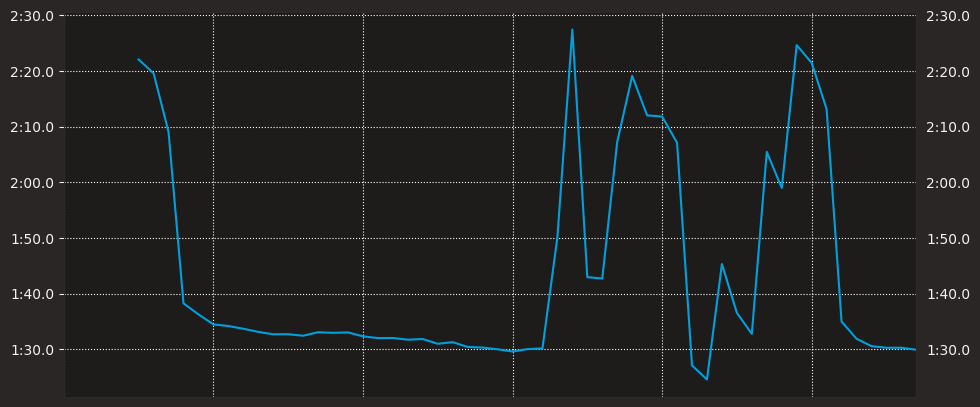

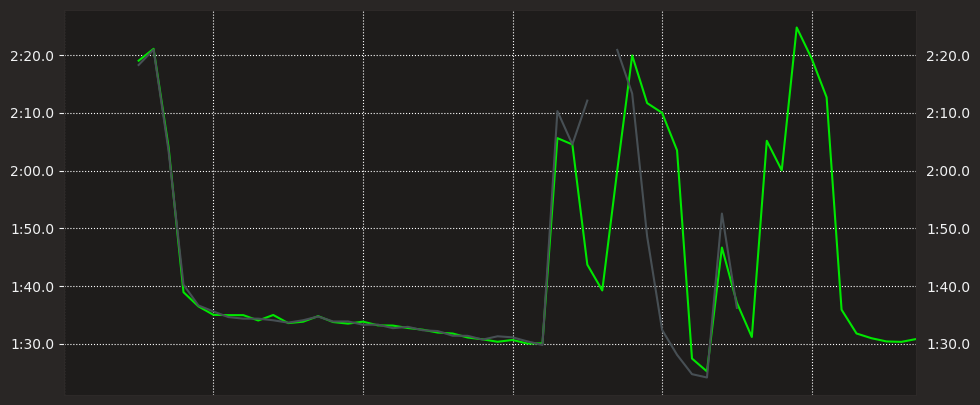

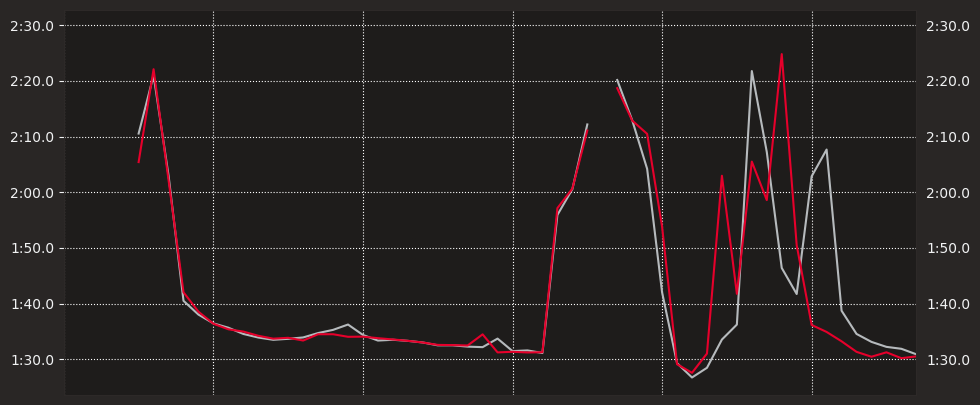

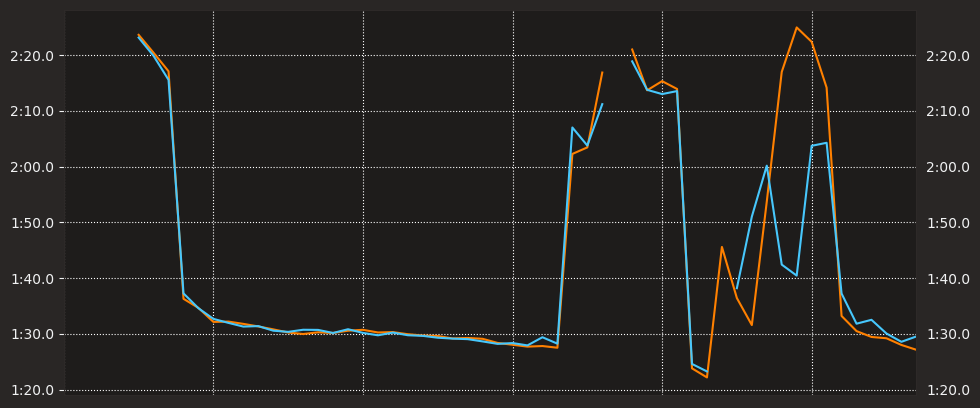

In [ ]:
#year = int(input('Year ? '))
#race_number = int(input('Race Number ? '))
#race_session = input('Session ? ')

year = 2025
race_number = 1
race_session = 'R'

session = fastf1.get_session(year, race_number, race_session)
session.load()

event_name = session.event.EventName
circuit_info = session.get_circuit_info()

start_time = time.time()
event_name = session.event.EventName
teams = fastf1.plotting.list_team_names(session)

for idx,team in enumerate(teams):
    team_drivers = fastf1.plotting.get_driver_abbreviations_by_team(team, session=session)
    team_color = fastf1.plotting.get_team_color(team, session=session)
    df_color=pd.read_csv("../data/raw/second_color.csv", index_col='team')
    team_color_2 = df_color.iat[idx,0]
    try:
        show_laptime_comp(team_drivers, session)
    except:
        print(f'No data for {team}')